In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

/home/debnatho/anaconda3/envs/trajectory_analysis_R/lib/python3.6/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
#Read normalized data from Seurat:
adata= sc.read_h5ad("Placenta_normalized_Seurat_markers.h5ad")

adata

AnnData object with n_obs × n_vars = 101031 × 26115 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'cell_type_semifinal_v2'
    uns: 'cell_type_semifinal_colors', 'umap_density_disease_params', 'umap_density_group_params', 'umap_density_params', 'umap_density_tissue_params'
    obsm: 'X_umap'

In [4]:
adata.obs['group'].value_counts()

Late_Villi_C       26431
Late_Villi_PE      22687
Early_Decidua_C    14506
Late_Decidua_C     13244
Late_Decidua_PE    12975
Early_Villi_C      11188
Name: group, dtype: int64

In [5]:
#Subset disease (PE) data in villi:
subset= ['Late_Villi_PE']

adata_pe= adata[adata.obs['group'].isin(subset)]
adata_pe

View of AnnData object with n_obs × n_vars = 22687 × 26115 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'cell_type_semifinal_v2'
    uns: 'cell_type_semifinal_colors', 'umap_density_disease_params', 'umap_density_group_params', 'umap_density_params', 'umap_density_tissue_params'
    obsm: 'X_umap'

In [6]:
adata_pe.obs['cell_type_semifinal_v2'].cat.categories

Index(['vBcell', 'vDC', 'vEB', 'vEVT', 'vFB', 'vHBC', 'vMC', 'vSCT_1',
       'vSCT_2', 'vTSC', 'vTcell', 'vVCT', 'vVCT_prol', 'vVEC', 'vtropho_15'],
      dtype='object')

In [7]:
#Exclude vEVT/vBcell i.e., celltypes for which we don't have any statistically significant PE markers. 
#vtropho15 is vSCTjuv; vDC is vPAMM. 

subset= ['vDC', 'vHBC', 'vTcell', 'vMC', 'vFB',  'vVEC', 'vSCT_1', 'vSCT_2', 'vtropho_15', 'vVCT']

adata_pe= adata_pe[adata_pe.obs['cell_type_semifinal_v2'].isin(subset)]

adata_pe

View of AnnData object with n_obs × n_vars = 22534 × 26115 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'integrated_snn_res.0.5', 'seurat_clusters', 'group', 'disease', 'time', 'tissue', 'tissue_time', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'cell_type', 'RNA_snn_res.0.8', 'Merged_cell_type_PC35', 'cell_type_merged', 'sub_cluster', 'sub_cluster_final', 'cell_type_semifinal', 'cell_type_semifinal_v2'
    uns: 'cell_type_semifinal_colors', 'umap_density_disease_params', 'umap_density_group_params', 'umap_density_params', 'umap_density_tissue_params'
    obsm: 'X_umap'

In [8]:
#Plot the major shared genes across the villi/placenta cell types:

gene_list= ['FLT1', 'FOS', 'CGA', 'GADD45G', 'SAT1', 'PAPPA2', 'PSG9', 'TFPI2', 'LINC01949',
            'GDF15', 'MAN1C1', 'PAPPA', 'PLAC4', 'ADAM12', 'CYP19A1', 'CSH1', 'KISS1', 'PSG1', 'ACADVL', 'PSG11']

         Falling back to preprocessing with `sc.pp.pca` and default params.


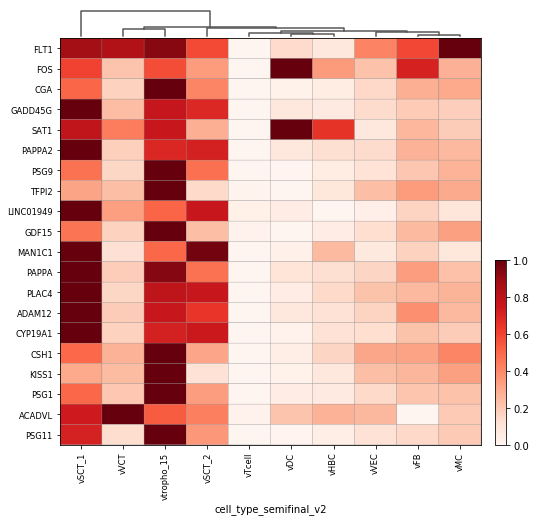

In [9]:
#Creates a heatmap of the mean expression values per group of each genes (matrix plot). 
gs = sc.pl.matrixplot(adata_pe, gene_list, groupby='cell_type_semifinal_v2', dendrogram=True,
                      use_raw=False, cmap= 'Reds', standard_scale='var', swap_axes=True, figsize=(8,8))

In [10]:
#Reorder the cell types: 
categories_order= ['vSCT_1', 'vSCT_2', 'vtropho_15', 'vVCT', 'vVEC', 'vMC', 'vFB', 'vHBC', 'vDC', 'vTcell']

adata_pe.obs['cell_type_semifinal_v3'] = adata_pe.obs['cell_type_semifinal_v2'].cat.reorder_categories(list(categories_order)) #ordered=True
adata_pe.obs['cell_type_semifinal_v3'].cat.categories

Index(['vSCT_1', 'vSCT_2', 'vtropho_15', 'vVCT', 'vVEC', 'vMC', 'vFB', 'vHBC',
       'vDC', 'vTcell'],
      dtype='object')

In [11]:
#Union of overlapped DEG(s): 
gene_list= ['FLT1', 'FOS', 'CGA', 'GADD45G', 'SAT1', 'PAPPA2', 'PSG9', 'TFPI2', 'LINC01949',
            'GDF15', 'MAN1C1', 'PAPPA', 'PLAC4', 'ADAM12', 'CYP19A1', 'CSH1', 'KISS1', 'PSG1', 'ACADVL', 'PSG11',
           'HTRA4', 'FOSB', 'SH3PXD2A', 'ARL17B', 'PLIN2', 'UCK2', 'SPDYE2', 'DPYD', 'LRP4', 'TESK2', 'TC2N',
            'PID1', 'ADM', 'ARHGAP12', 'FTH1', 'HLA-C', 'LINGO1', 'UTRN', 'SNX13', 'TGM2', 'MEF2A', 'TCF12', 'MBNL1',
           'KHDRBS2', 'ITPR2', 'LEP', 'SERPINE1', 'RHOBTB1', 'KRT19', 'EBI3', 'SVEP1', 'RALGAPA2', 'AC015849.5', 'CSH2',
            'KRT7', 'WDFY3', 'HSPB1', 'ARAP2', 'INHBA', 'PDLIM5', 'SSBP2', 'FBN2', 'CEBPB', 'ANXA4', 'AC011287.1',
            'MMP11', 'HSD3B1', 'DEPDC1B', 'PSG2', 'BCAR4', 'PSG6', 'PKIB', 'EFHD1', 'STRA6', 'ZBTB20', 'EXPH5', 'PSG5',
            'GH2', 'PSG3', 'PSG4', 'EGFL7', 'RAPGEF2', 'PTPRK', 'NFIB', 'NEAT1', 'CHODL', 'GRIK2', 'MIR2052HG', 'CNOT2']

In [13]:
sc.set_figure_params(dpi_save=400)

In [14]:
sc.set_figure_params(dpi_save=200)

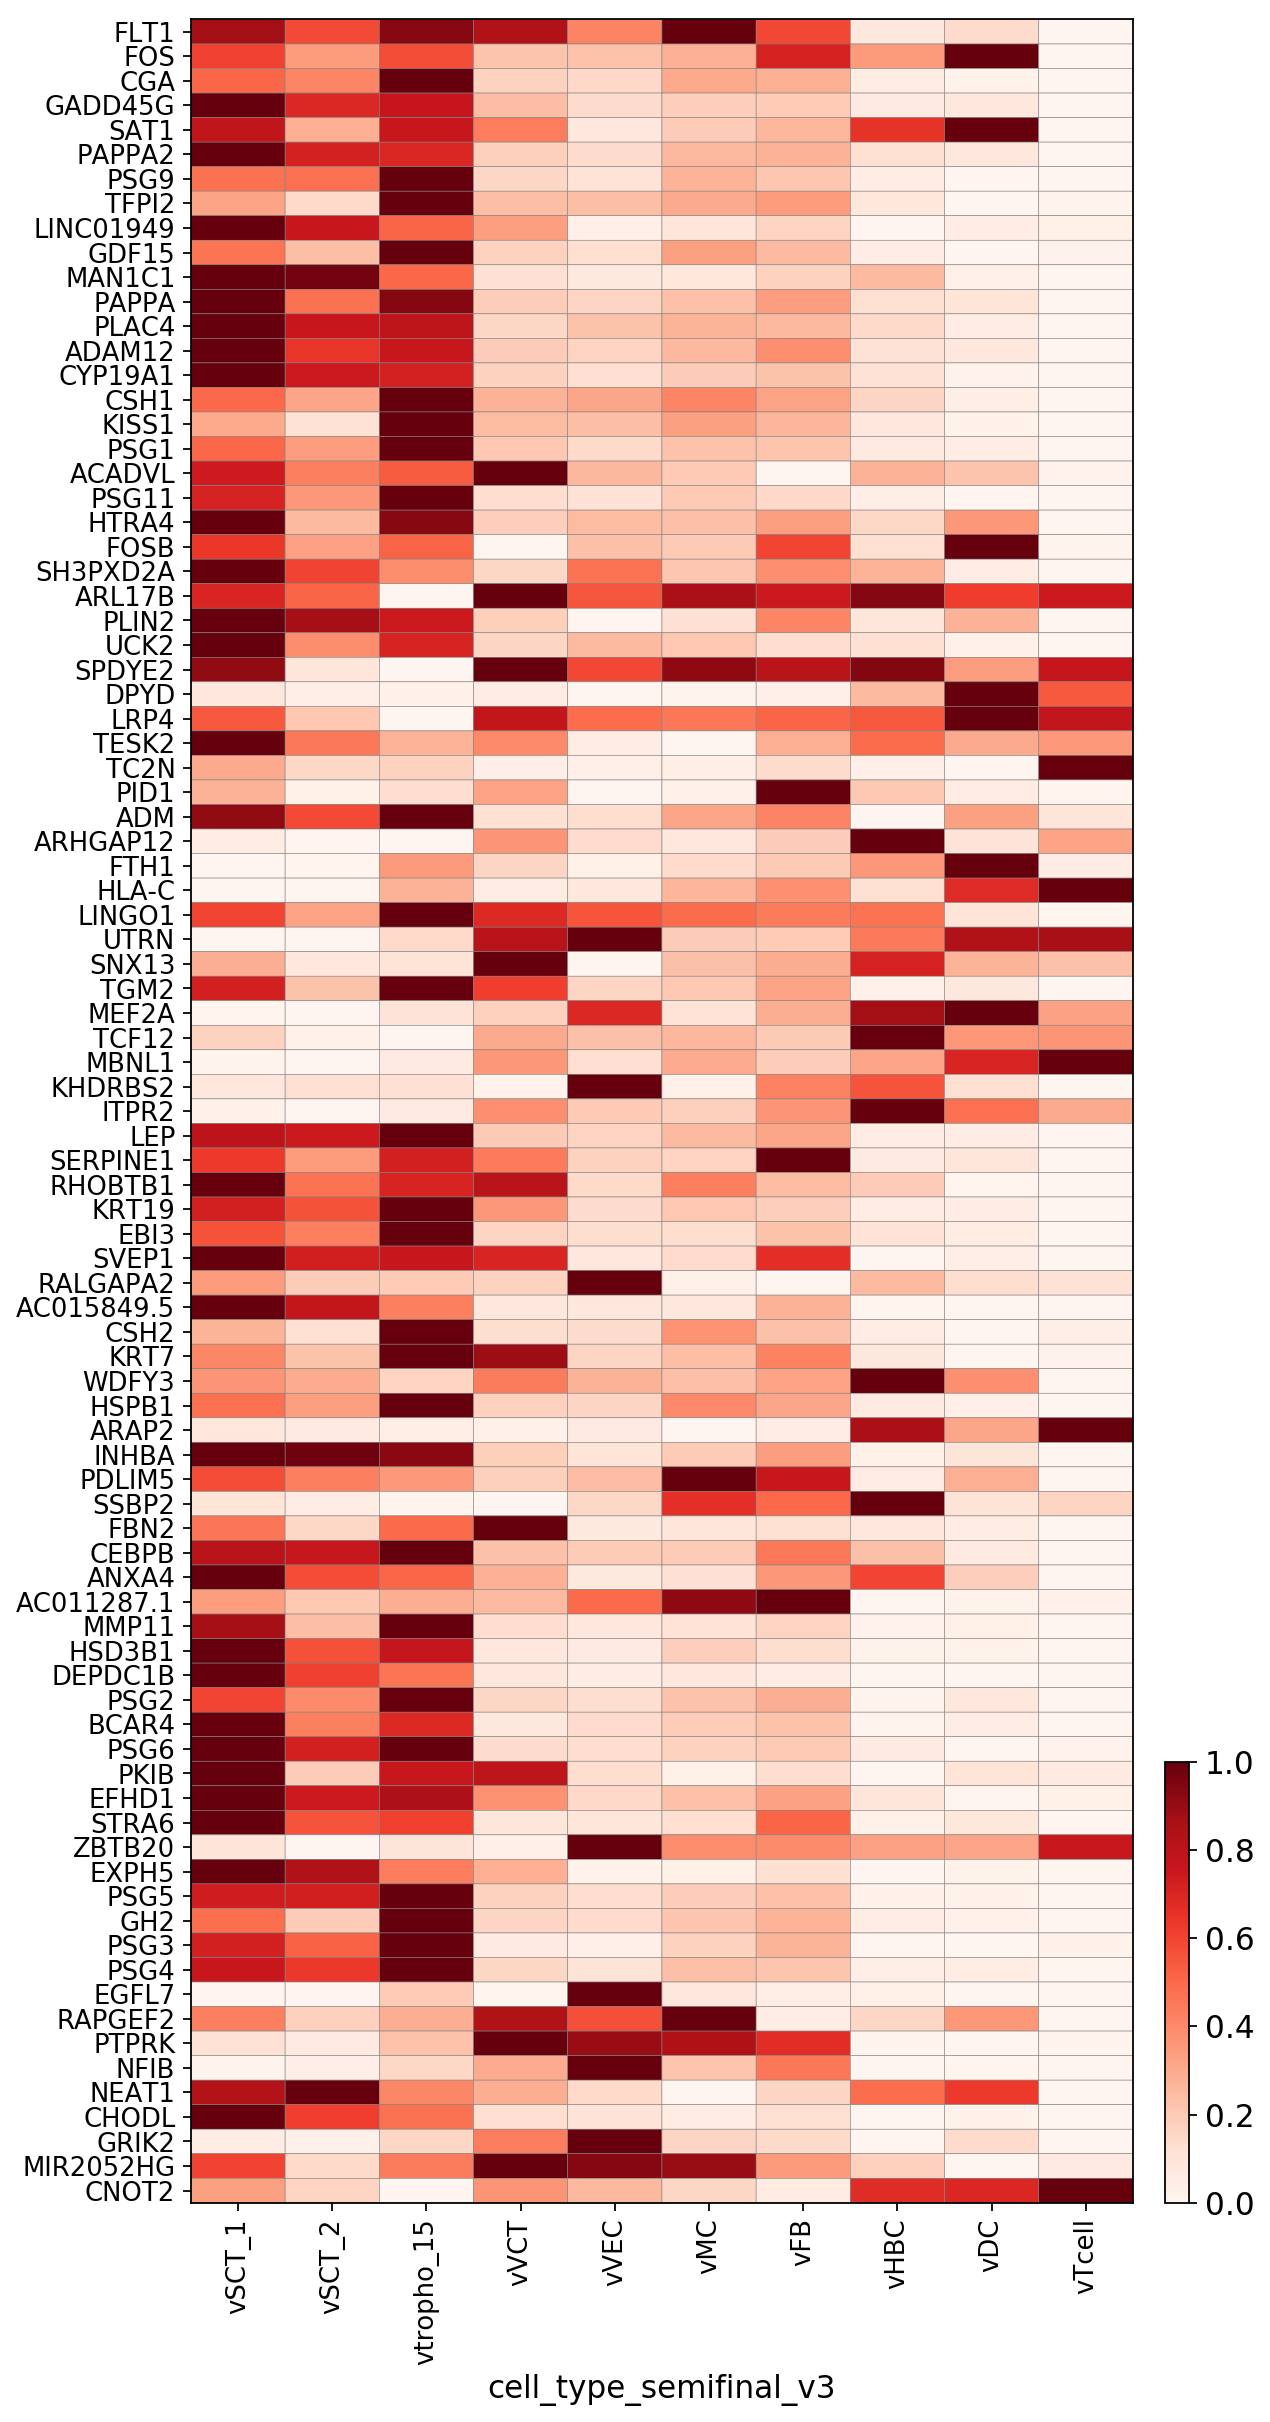

In [15]:
gs = sc.pl.matrixplot(adata_pe, gene_list, groupby='cell_type_semifinal_v3', dendrogram=False,
                      use_raw=False, cmap= 'Reds', standard_scale='var', swap_axes=True, figsize=(8, 18))

In the manuscript, FLT1/FOS to PSG11 are annotated. 